## Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import Libraries

In [ ]:
import pandas as pd
import shutil
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
!pip install python-docx
from docx import Document

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00


## Show Brand Result

In [ ]:
# Set all paths accordingly based on your files:

# Define the brands and their corresponding file paths
file_paths = {
    "Asus": "/content/drive/MyDrive/ABSA/Result/1_Asus/Asus_Sentiment.csv",
    "Acer": "/content/drive/MyDrive/ABSA/Result/2_Acer/Acer_Sentiment.csv",
    "Apple": "/content/drive/MyDrive/ABSA/Result/3_Apple/Apple_Sentiment.csv",
    "Dell": "/content/drive/MyDrive/ABSA/Result/4_Dell/Dell_Sentiment.csv",
    "HP": "/content/drive/MyDrive/ABSA/Result/5_HP/HP_Sentiment.csv",
    "Lenovo": "/content/drive/MyDrive/ABSA/Result/6_Lenovo/Lenovo_Sentiment.csv",
    "Microsoft": "/content/drive/MyDrive/ABSA/Result/7_Microsoft/Microsoft_Sentiment.csv"
}


# Define the paths to save the plots
save_paths = {
    "Asus": "/content/drive/MyDrive/ABSA/Result/0_Plot/Asus_sentiment_plot.png",
    "Acer": "/content/drive/MyDrive/ABSA/Result/0_Plot/Acer_sentiment_plot.png",
    "Apple": "/content/drive/MyDrive/ABSA/Result/0_Plot/Apple_sentiment_plot.png",
    "Dell": "/content/drive/MyDrive/ABSA/Result/0_Plot/Dell_sentiment_plot.png",
    "HP": "/content/drive/MyDrive/ABSA/Result/0_Plot/HP_sentiment_plot.png",
    "Lenovo": "/content/drive/MyDrive/ABSA/Result/0_Plot/Lenovo_sentiment_plot.png",
    "Microsoft": "/content/drive/MyDrive/ABSA/Result/0_Plot/Microsoft_sentiment_plot.png"
}

In [ ]:
# Function to process each CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path)
    aspect_columns = [col for col in df.columns if '_info' in col]
    results = {}

    for col in aspect_columns:
        aspect_name = col.split('_')[0]
        overall_sentiment = df[col][0]
        num_positive = int(re.search(r'#Positive: (\d+)', df[col][2]).group(1))
        num_negative = int(re.search(r'#Negative: (\d+)', df[col][3]).group(1))
        num_neutral = int(re.search(r'#Neutral: (\d+)', df[col][4]).group(1))

        results[aspect_name] = {
            'overall_sentiment': overall_sentiment,
            'num_positive': num_positive,
            'num_negative': num_negative,
            'num_neutral': num_neutral
        }

    return pd.DataFrame(results).T

In [ ]:
# Initialize a dictionary to store the DataFrames for each brand
brand_data = {}

# Process each brand's CSV file
for brand, path in file_paths.items():
    brand_data[brand] = process_csv(path)

# Plotting the results for each brand separately and saving the plots
for brand, results_df in brand_data.items():
    aspects = results_df.index
    num_positive = results_df['num_positive']
    num_negative = results_df['num_negative']

    plt.figure(figsize=(14, 8))

    bar_width = 0.35
    index = range(len(aspects))

    plt.bar(index, num_positive, bar_width, label='Positive', color='g')
    plt.bar([i + bar_width for i in index], num_negative, bar_width, label='Negative', color='r')

    plt.xlabel('Aspects')
    plt.ylabel('Number of Reviews')
    plt.title(f'Aspect-Based Sentiment Analysis Results for {brand}')
    plt.xticks([i + bar_width / 2 for i in index], aspects, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.savefig(save_paths[brand])
    plt.close()

<ipython-input-22-275879d90c35>:3: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-22-275879d90c35>:3: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-22-275879d90c35>:3: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-22-275879d90c35>:3: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-22-275879d90c35>:3: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have

## Heat Maps

In [ ]:
# Set all paths accordingly based on your files:

# Define the brands and their corresponding file paths
file_paths = {
    "Asus": "/content/drive/MyDrive/ABSA/Result/1_Asus/Asus_Sentiment.csv",
    "Acer": "/content/drive/MyDrive/ABSA/Result/2_Acer/Acer_Sentiment.csv",
    "Apple": "/content/drive/MyDrive/ABSA/Result/3_Apple/Apple_Sentiment.csv",
    "Dell": "/content/drive/MyDrive/ABSA/Result/4_Dell/Dell_Sentiment.csv",
    "HP": "/content/drive/MyDrive/ABSA/Result/5_HP/HP_Sentiment.csv",
    "Lenovo": "/content/drive/MyDrive/ABSA/Result/6_Lenovo/Lenovo_Sentiment.csv",
    "Microsoft": "/content/drive/MyDrive/ABSA/Result/7_Microsoft/Microsoft_Sentiment.csv"
}

In [ ]:
# Function to process each CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    aspect_columns = [col for col in df.columns if '_info' in col]
    results = {}

    for col in aspect_columns:
        aspect_name = col.split('_')[0]
        overall_sentiment = df[col][0]
        num_positive = int(re.search(r'#Positive: (\d+)', str(df[col][2])).group(1))
        num_negative = int(re.search(r'#Negative: (\d+)', str(df[col][3])).group(1))
        num_neutral = int(re.search(r'#Neutral: (\d+)', str(df[col][4])).group(1))
        total_reviews = num_positive + num_negative + num_neutral

        results[aspect_name] = {
            'overall_sentiment': overall_sentiment,
            'num_positive': num_positive,
            'num_negative': num_negative,
            'num_neutral': num_neutral,
            'total_reviews': total_reviews,
            'normalized_positive': num_positive / total_reviews if total_reviews > 0 else 0,
            'normalized_negative': num_negative / total_reviews if total_reviews > 0 else 0
        }

    return pd.DataFrame(results).T

In [ ]:
# Initialize dictionaries to store the normalized data for heatmaps
normalized_positive_reviews = pd.DataFrame()
normalized_negative_reviews = pd.DataFrame()

# Process each brand's CSV file and collect data for heatmaps
for brand, path in file_paths.items():
    results_df = process_csv(path)
    normalized_positive_reviews[brand] = results_df['normalized_positive']
    normalized_negative_reviews[brand] = results_df['normalized_negative']

# Ensure all data in DataFrames are numeric
normalized_positive_reviews = normalized_positive_reviews.apply(pd.to_numeric, errors='coerce')
normalized_negative_reviews = normalized_negative_reviews.apply(pd.to_numeric, errors='coerce')

# Plotting the heatmap for normalized positive reviews
plt.figure(figsize=(14, 10))
sns.heatmap(normalized_positive_reviews.T, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Proportion of Positive Reviews'})
plt.title('Heatmap of Normalized Positive Reviews for Aspects and Brands')
plt.xlabel('Aspects')
plt.ylabel('Brands')
plt.show()

# Plotting the heatmap for normalized negative reviews
plt.figure(figsize=(14, 10))
sns.heatmap(normalized_negative_reviews.T, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Proportion of Negative Reviews'})
plt.title('Heatmap of Normalized Negative Reviews for Aspects and Brands')
plt.xlabel('Aspects')
plt.ylabel('Brands')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Data preparation for stacked bar chart
positive_reviews_counts = positive_reviews.apply(pd.to_numeric, errors='coerce')
negative_reviews_counts = negative_reviews.apply(pd.to_numeric, errors='coerce')
neutral_reviews_counts = positive_reviews_counts + negative_reviews_counts

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

brands = positive_reviews_counts.columns
aspects = positive_reviews_counts.index
bar_width = 0.35

for i, brand in enumerate(brands):
    ax.barh(aspects, positive_reviews_counts[brand], bar_width, label=f'{brand} Positive', left=neutral_reviews_counts[brand])
    ax.barh(aspects, negative_reviews_counts[brand], bar_width, label=f'{brand} Negative', left=neutral_reviews_counts[brand] + positive_reviews_counts[brand])

ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Aspects')
ax.set_title('Stacked Bar Chart of Sentiment Reviews for Aspects and Brands')
ax.legend()

plt.show()


## Radar Chart

In [ ]:
# Data preparation for radar charts
categories = list(normalized_positive_reviews.index)
num_categories = len(categories)

# Define colors for each brand
colors = {
    "Asus": "b",
    "Acer": "g",
    "Apple": "r",
    "Dell": "c",
    "HP": "m",
    "Lenovo": "y",
    "Microsoft": "k"
}

# Function to create radar chart for a brand
def create_radar_chart(brand, data, title, color):
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]

    values = list(data[brand]) + [data[brand][0]]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=brand, color=color)
    ax.fill(angles, values, color=color, alpha=0.4)

    #plt.title(f'{title} for {brand}')
    plt.title(f'{title}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


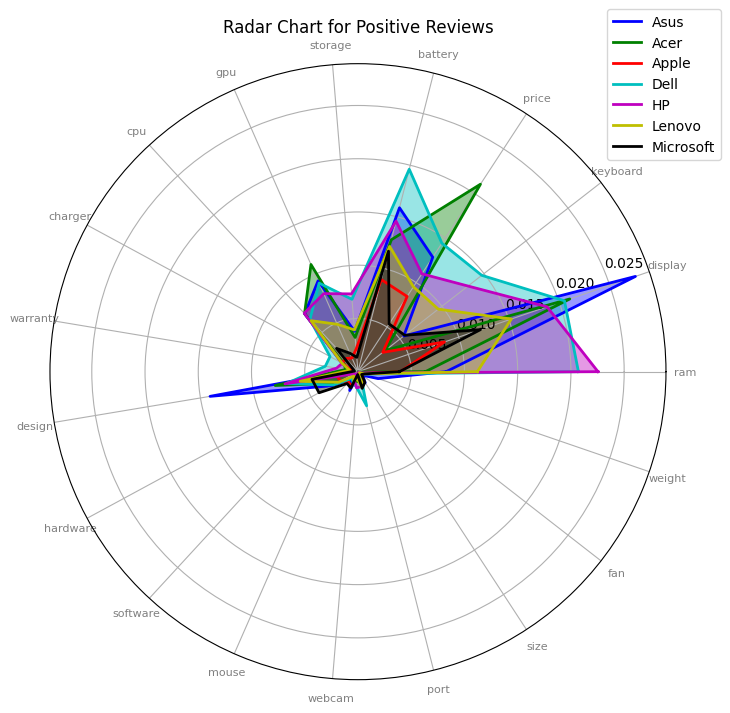

In [ ]:
# Plotting radar charts for all brands for positive reviews
plt.figure(figsize=(14, 8))
for brand in normalized_positive_reviews.columns:
    create_radar_chart(brand, normalized_positive_reviews, 'Radar Chart for Positive Reviews', colors[brand])
plt.show()

In [ ]:
# Data preparation for radar charts
categories = list(normalized_negative_reviews.index)
num_categories = len(categories)

# Function to create radar chart for a brand
def create_radar_chart(brand, data, title, color):
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]

    values = list(data[brand]) + [data[brand][0]]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=brand, color=color)
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(f'{title}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

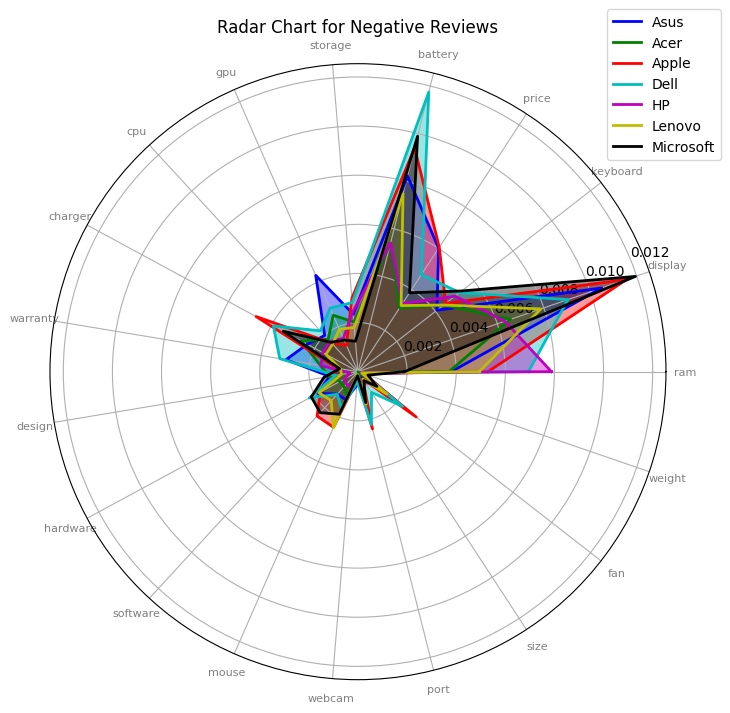

In [ ]:
# Plotting radar charts for all brands for negative reviews
plt.figure(figsize=(14, 8))
for brand in normalized_negative_reviews.columns:
    create_radar_chart(brand, normalized_negative_reviews, 'Radar Chart for Negative Reviews', colors[brand])
plt.show()

In [ ]:
# Data preparation for radar charts
categories = list(normalized_positive_reviews.index)
num_categories = len(categories)

# Set all paths accordingly based on your files:

# Define save paths for each brand
save_paths = {
    "Asus": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Asus_sentiment_radar_chart.png",
    "Acer": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Acer_sentiment_radar_chart.png",
    "Apple": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Apple_sentiment_radar_chart.png",
    "Dell": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Dell_sentiment_radar_chart.png",
    "HP": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/HP_sentiment_radar_chart.png",
    "Lenovo": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Lenovo_sentiment_radar_chart.png",
    "Microsoft": "/content/drive/MyDrive/ABSA/Result/00_Radar Chart/Microsoft_sentiment_radar_chart.png"
}

In [ ]:
# Function to create combined radar chart for a brand
def create_combined_radar_chart(brand, save_path):
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]

    values_positive = list(normalized_positive_reviews[brand]) + [normalized_positive_reviews[brand][0]]
    values_negative = list(normalized_negative_reviews[brand]) + [normalized_negative_reviews[brand][0]]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.plot(angles, values_positive, linewidth=2, linestyle='solid', label=f'{brand} Positive', color='g')
    ax.fill(angles, values_positive, color='g', alpha=0.4)

    ax.plot(angles, values_negative, linewidth=2, linestyle='solid', label=f'{brand} Negative', color='r')
    ax.fill(angles, values_negative, color='r', alpha=0.4)

    plt.title(f'Combined Radar Chart for Positive and Negative Reviews of {brand}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.savefig(save_path)
    plt.close()

In [ ]:
# Plotting combined radar charts for all brands and saving the plots
for brand in normalized_positive_reviews.columns:
    create_combined_radar_chart(brand, save_paths[brand])

## Radar Chart V2

In [ ]:
# Set all paths accordingly based on your files:

# Define the path to the single CSV file
file_path = 'Path to the final result of ABSA (.csv)'
# Define save paths for the plots
save_paths = {
    "positive": "/content/drive/MyDrive/ABSA/Dataset2_Location/New Data/ABSA/Plot/2_Radar Chart/Developing/Radar_Chart_Positive_Reviews_Developing.png",
    "negative": "/content/drive/MyDrive/ABSA/Dataset2_Location/New Data/ABSA/Plot/2_Radar Chart/Developing/Radar_Chart_Negative_Reviews_Developing.png",
    "combined": "/content/drive/MyDrive/ABSA/Dataset2_Location/New Data/ABSA/Plot/2_Radar Chart/Developing/Radar_Chart_Combined_Reviews_Developing.png"
}

In [ ]:
# Function to process the CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    aspect_columns = [col for col in df.columns if '_info' in col]
    results = {}

    for col in aspect_columns:
        aspect_name = col.split('_')[0]
        overall_sentiment = df[col][0]
        num_positive = int(re.search(r'#Positive: (\d+)', str(df[col][2])).group(1))
        num_negative = int(re.search(r'#Negative: (\d+)', str(df[col][3])).group(1))
        num_neutral = int(re.search(r'#Neutral: (\d+)', str(df[col][4])).group(1))
        total_reviews = num_positive + num_negative + num_neutral

        results[aspect_name] = {
            'overall_sentiment': overall_sentiment,
            'num_positive': num_positive,
            'num_negative': num_negative,
            'num_neutral': num_neutral,
            'total_reviews': total_reviews,
            'normalized_positive': num_positive / total_reviews if total_reviews > 0 else 0,
            'normalized_negative': num_negative / total_reviews if total_reviews > 0 else 0
        }

    return pd.DataFrame(results).T

# Process the CSV file and collect data for heatmaps
results_df = process_csv(file_path)
normalized_positive_reviews = results_df['normalized_positive']
normalized_negative_reviews = results_df['normalized_negative']

# Ensure all data in Series are numeric
normalized_positive_reviews = normalized_positive_reviews.apply(pd.to_numeric, errors='coerce')
normalized_negative_reviews = normalized_negative_reviews.apply(pd.to_numeric, errors='coerce')

# Data preparation for radar charts
categories = list(normalized_positive_reviews.index)
num_categories = len(categories)

# Function to create radar chart
def create_radar_chart(data, title, color, save_path):
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]

    values = list(data) + [data[0]]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(f'{title}')
    ax.yaxis.set_tick_params(labelleft=False)  # Remove radial axis labels for better visualization

    # Save the plot
    plt.savefig(save_path)
    plt.close()

In [ ]:
# Plotting and saving radar chart for positive reviews
create_radar_chart(normalized_positive_reviews, 'Distribution of Positive Reviews for Developing Countries', 'g', save_paths["positive"])

# Plotting and saving radar chart for negative reviews
create_radar_chart(normalized_negative_reviews, 'Distribution of Negative Reviews for Developing Countries', 'r', save_paths["negative"])

<ipython-input-37-1f144e160b2d>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = list(data) + [data[0]]


In [ ]:
# Function to create combined radar chart
def create_combined_radar_chart(positive_data, negative_data, title, save_path):
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]

    values_positive = list(positive_data) + [positive_data[0]]
    values_negative = list(negative_data) + [negative_data[0]]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.plot(angles, values_positive, linewidth=2, linestyle='solid', label='Positive', color='g')
    ax.fill(angles, values_positive, color='g', alpha=0.4)

    ax.plot(angles, values_negative, linewidth=2, linestyle='solid', label='Negative', color='r')
    ax.fill(angles, values_negative, color='r', alpha=0.4)

    plt.title(f'{title}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.08))

    # Remove radial axis labels for better visualization
    ax.yaxis.set_tick_params(labelleft=False)

    # Save the plot
    plt.savefig(save_path)
    plt.close()

In [ ]:
# Plotting and saving combined radar chart for positive and negative reviews
create_combined_radar_chart(normalized_positive_reviews, normalized_negative_reviews, 'Distribution of Positive and Negative Reviews for Developing Countries', save_paths["combined"])

<ipython-input-39-3209c47063df>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_positive = list(positive_data) + [positive_data[0]]
<ipython-input-39-3209c47063df>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_negative = list(negative_data) + [negative_data[0]]


## Butterfly Chart

In [ ]:
# Set all paths accordingly based on your files:

# Define the paths to the CSV files for each brand
file_paths = {
    "Asus": "/content/drive/MyDrive/ABSA/Result/1_Asus/Asus_Sentiment.csv",
    "Acer": "/content/drive/MyDrive/ABSA/Result/2_Acer/Acer_Sentiment.csv",
    "Apple": "/content/drive/MyDrive/ABSA/Result/3_Apple/Apple_Sentiment.csv",
    "Dell": "/content/drive/MyDrive/ABSA/Result/4_Dell/Dell_Sentiment.csv",
    "HP": "/content/drive/MyDrive/ABSA/Result/5_HP/HP_Sentiment.csv",
    "Lenovo": "/content/drive/MyDrive/ABSA/Result/6_Lenovo/Lenovo_Sentiment.csv",
    "Microsoft": "/content/drive/MyDrive/ABSA/Result/7_Microsoft/Microsoft_Sentiment.csv"
}

# Define the base path to save the plots
save_base_path = "Path to save the result"

In [ ]:
# Function to process the CSV file
def process_csv(file_path):
    df = pd.read_csv(file_path, low_memory=False)
    aspect_columns = [col for col in df.columns if '_info' in col]
    results = {}

    for col in aspect_columns:
        aspect_name = col.split('_')[0]
        num_positive = int(re.search(r'#Positive: (\d+)', str(df[col][2])).group(1))
        num_negative = int(re.search(r'#Negative: (\d+)', str(df[col][3])).group(1))

        total_reviews = num_positive + num_negative

        results[aspect_name] = {
            'num_positive': num_positive,
            'num_negative': num_negative,
            'total_reviews': total_reviews,
            'percentage_positive': (num_positive / total_reviews) * 100 if total_reviews > 0 else 0,
            'percentage_negative': (num_negative / total_reviews) * 100 if total_reviews > 0 else 0
        }

    return pd.DataFrame(results).T

# Function to create and save butterfly chart for a given brand
def create_butterfly_chart(brand, results_df, save_path):
    # Preparing data for butterfly chart
    categories = results_df.index
    positive_reviews = results_df['percentage_positive']
    negative_reviews = results_df['percentage_negative']

    # Plotting butterfly chart
    fig, ax = plt.subplots(figsize=(14, 8))

    y_pos = np.arange(len(categories))

    ax.barh(y_pos, positive_reviews, align='center', color='green')
    ax.barh(y_pos, -negative_reviews, align='center', color='red')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Percentage of Reviews')
    ax.set_title(f'Butterfly Chart of Positive and Negative Reviews for {brand}')

    # Adjusting the horizontal axis for negative reviews to display as positive values
    for i in range(len(y_pos)):
        ax.text(positive_reviews[i] + 1, y_pos[i], f'{positive_reviews[i]:.1f}%', va='center', ha='left', color='green')
        ax.text(-negative_reviews[i] - 1, y_pos[i], f'{negative_reviews[i]:.1f}%', va='center', ha='right', color='red')

    # Set custom ticks for the horizontal axis to display as positive values
    ax.set_xticks(np.arange(-100, 101, 10))
    ax.set_xticklabels([str(abs(int(x))) for x in np.arange(-100, 101, 10)])

    # Customize the grid to show only horizontal lines
    ax.grid(axis='y')

    # Save the plot
    plt.legend()
    plt.savefig(save_path)
    plt.close()

In [ ]:
# Process each CSV file and create butterfly charts
for brand, file_path in file_paths.items():
    results_df = process_csv(file_path)
    save_path = save_base_path.format(brand)
    create_butterfly_chart(brand, results_df, save_path)

    # Print the percentages for positive and negative reviews for all aspects for each brand
    print(f"Results for {brand}:")
    for aspect in results_df.index:
        print(f"{aspect} - Positive: {results_df.at[aspect, 'percentage_positive']:.2f}% | Negative: {results_df.at[aspect, 'percentage_negative']:.2f}%")
    print("\n")

Results for Asus:
ram - Positive: 68.57% | Negative: 31.43%
display - Positive: 72.41% | Negative: 27.59%
keyboard - Positive: 57.25% | Negative: 42.75%
price - Positive: 68.13% | Negative: 31.87%
battery - Positive: 65.90% | Negative: 34.10%
storage - Positive: 61.80% | Negative: 38.20%
gpu - Positive: 68.53% | Negative: 31.47%
cpu - Positive: 78.68% | Negative: 21.32%
charger - Positive: 42.37% | Negative: 57.63%
warranty - Positive: 20.37% | Negative: 79.63%
design - Positive: 92.31% | Negative: 7.69%
webcam - Positive: 46.67% | Negative: 53.33%
port - Positive: 62.50% | Negative: 37.50%
size - Positive: 85.71% | Negative: 14.29%
fan - Positive: 21.62% | Negative: 78.38%
weight - Positive: 87.88% | Negative: 12.12%




Results for Acer:
ram - Positive: 63.10% | Negative: 36.90%
display - Positive: 76.19% | Negative: 23.81%
keyboard - Positive: 42.19% | Negative: 57.81%
price - Positive: 87.13% | Negative: 12.87%
battery - Positive: 70.39% | Negative: 29.61%
storage - Positive: 61.36% | Negative: 38.64%
gpu - Positive: 81.42% | Negative: 18.58%
cpu - Positive: 80.52% | Negative: 19.48%
charger - Positive: 35.29% | Negative: 64.71%
warranty - Positive: 43.48% | Negative: 56.52%
design - Positive: 86.84% | Negative: 13.16%
webcam - Positive: 88.89% | Negative: 11.11%
port - Positive: 75.00% | Negative: 25.00%
size - Positive: 0.00% | Negative: 0.00%
fan - Positive: 0.00% | Negative: 100.00%
weight - Positive: 50.00% | Negative: 50.00%




Results for Apple:
ram - Positive: 42.86% | Negative: 57.14%
display - Positive: 42.61% | Negative: 57.39%
keyboard - Positive: 39.49% | Negative: 60.51%
price - Positive: 58.23% | Negative: 41.77%
battery - Positive: 48.70% | Negative: 51.30%
storage - Positive: 41.44% | Negative: 58.56%
gpu - Positive: 54.49% | Negative: 45.51%
cpu - Positive: 51.37% | Negative: 48.63%
charger - Positive: 26.63% | Negative: 73.37%
warranty - Positive: 38.95% | Negative: 61.05%
design - Positive: 67.52% | Negative: 32.48%
webcam - Positive: 40.62% | Negative: 59.38%
port - Positive: 33.33% | Negative: 66.67%
size - Positive: 66.15% | Negative: 33.85%
fan - Positive: 15.38% | Negative: 84.62%
weight - Positive: 68.12% | Negative: 31.88%




Results for Dell:
ram - Positive: 74.89% | Negative: 25.11%
display - Positive: 69.40% | Negative: 30.60%
keyboard - Positive: 73.74% | Negative: 26.26%
price - Positive: 75.32% | Negative: 24.68%
battery - Positive: 62.55% | Negative: 37.45%
storage - Positive: 70.71% | Negative: 29.29%
gpu - Positive: 76.27% | Negative: 23.73%
cpu - Positive: 74.66% | Negative: 25.34%
charger - Positive: 43.27% | Negative: 56.73%
warranty - Positive: 49.04% | Negative: 50.96%
design - Positive: 88.02% | Negative: 11.98%
webcam - Positive: 78.72% | Negative: 21.28%
port - Positive: 59.85% | Negative: 40.15%
size - Positive: 32.43% | Negative: 67.57%
fan - Positive: 12.31% | Negative: 87.69%
weight - Positive: 80.95% | Negative: 19.05%




Results for HP:
ram - Positive: 74.10% | Negative: 25.90%
display - Positive: 74.79% | Negative: 25.21%
keyboard - Positive: 72.34% | Negative: 27.66%
price - Positive: 76.83% | Negative: 23.17%
battery - Positive: 72.96% | Negative: 27.04%
storage - Positive: 74.79% | Negative: 25.21%
gpu - Positive: 84.33% | Negative: 15.67%
cpu - Positive: 81.65% | Negative: 18.35%
charger - Positive: 50.63% | Negative: 49.37%
warranty - Positive: 57.06% | Negative: 42.94%
design - Positive: 95.40% | Negative: 4.60%
webcam - Positive: 90.12% | Negative: 9.88%
port - Positive: 66.67% | Negative: 33.33%
size - Positive: 62.12% | Negative: 37.88%
fan - Positive: 6.67% | Negative: 93.33%
weight - Positive: 75.00% | Negative: 25.00%




Results for Lenovo:
ram - Positive: 69.40% | Negative: 30.60%
display - Positive: 65.91% | Negative: 34.09%
keyboard - Positive: 68.39% | Negative: 31.61%
price - Positive: 74.76% | Negative: 25.24%
battery - Positive: 61.89% | Negative: 38.11%
storage - Positive: 68.53% | Negative: 31.47%
gpu - Positive: 72.02% | Negative: 27.98%
cpu - Positive: 81.00% | Negative: 19.00%
charger - Positive: 53.75% | Negative: 46.25%
warranty - Positive: 52.63% | Negative: 47.37%
design - Positive: 88.96% | Negative: 11.04%
webcam - Positive: 85.00% | Negative: 15.00%
port - Positive: 53.42% | Negative: 46.58%
size - Positive: 64.00% | Negative: 36.00%
fan - Positive: 9.76% | Negative: 90.24%
weight - Positive: 80.00% | Negative: 20.00%




Results for Microsoft:
ram - Positive: 67.29% | Negative: 32.71%
display - Positive: 50.45% | Negative: 49.55%
keyboard - Positive: 50.99% | Negative: 49.01%
price - Positive: 58.24% | Negative: 41.76%
battery - Positive: 54.14% | Negative: 45.86%
storage - Positive: 52.08% | Negative: 47.92%
gpu - Positive: 57.38% | Negative: 42.62%
cpu - Positive: 64.71% | Negative: 35.29%
charger - Positive: 13.51% | Negative: 86.49%
warranty - Positive: 30.00% | Negative: 70.00%
design - Positive: 75.70% | Negative: 24.30%
webcam - Positive: 62.50% | Negative: 37.50%
port - Positive: 55.56% | Negative: 44.44%
size - Positive: 73.33% | Negative: 26.67%
fan - Positive: 30.77% | Negative: 69.23%
weight - Positive: 60.00% | Negative: 40.00%




## Time Trend Chart for Dataset

In [ ]:
# Set all paths accordingly based on your files:
file_path = 'Path to the final result of ABSA (.csv)'
df = pd.read_csv(file_path)

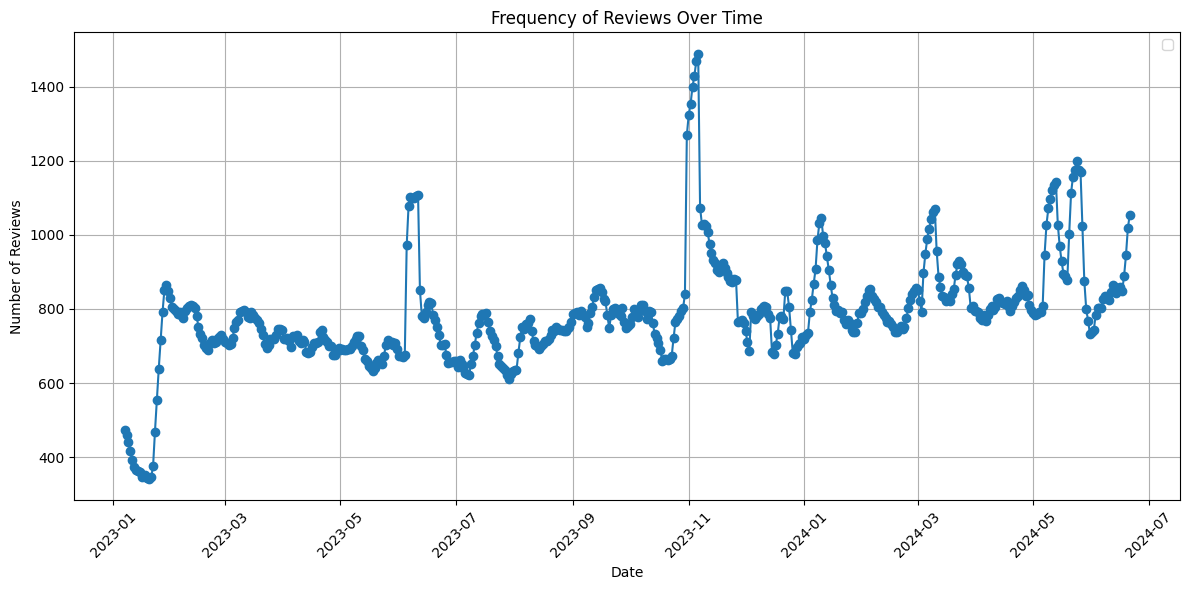

In [ ]:
# Extract date from 'tweet.created_at' and ignore the time
df['tweet.created_at'] = pd.to_datetime(df['tweet.created_at']).dt.date

# Group by date and count the number of reviews per day
date_counts = df['tweet.created_at'].value_counts().sort_index()

# Create a rolling average to smooth the line graph (7-day window)
rolling_average = date_counts.rolling(window=7).mean()

# Create a smoother line graph
plt.figure(figsize=(12, 6))
# plt.plot(date_counts.index, rolling_average, marker='o', label='7-day Rolling Average')
plt.plot(date_counts.index, rolling_average, marker='o')
plt.title('Frequency of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Save the plot
plt.savefig('Path to save the final figure')
plt.show()

## Sentiment Distribution by Aspect

In [ ]:
# Path to the CSV file in your Google Drive
file_path = 'Path to the final result of ABSA (.csv)'

# Read the CSV file
df = pd.read_csv(file_path)

# # List of aspects
# target_aspects = [
#     'ram', 'display', 'keyboard', 'price', 'battery', 'storage', 'gpu',
#     'cpu', 'charger', 'warranty', 'design', 'hardware', 'software',
#     'mouse', 'webcam', 'port', 'size', 'fan', 'weight'
# ]
# List of aspects
target_aspects = [
    'ram', 'display', 'keyboard', 'price', 'battery', 'storage', 'gpu',
    'cpu', 'charger', 'warranty', 'design', 'webcam', 'port', 'size', 'fan', 'weight'
]

<ipython-input-22-a97efcdfdee5>:5: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


      Aspect  Positive Percentage (%)  Negative Percentage (%)
0        ram                    61.45                    38.55
1    display                    55.72                    44.28
2   keyboard                    56.56                    43.44
3      price                    65.32                    34.68
4    battery                    56.54                    43.46
5    storage                    56.23                    43.77
6        gpu                    70.74                    29.26
7        cpu                    69.03                    30.97
8    charger                    31.67                    68.33
9   warranty                    44.58                    55.42
10    design                    82.23                    17.77
11    webcam                    67.39                    32.61
12      port                    43.23                    56.77
13      size                    63.64                    36.36
14       fan                    14.90                  

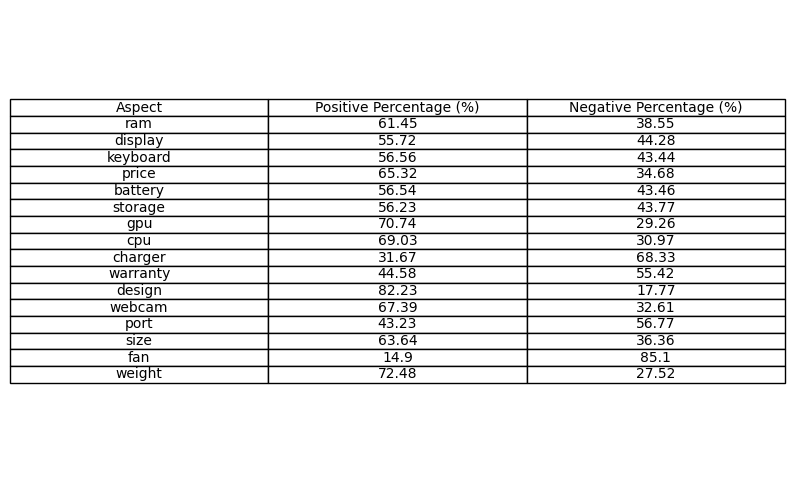

In [ ]:
# Initialize lists to store the results
aspect_positive_percentages = []
aspect_negative_percentages = []

# Calculate percentages for each aspect
for aspect in target_aspects:
    positive_reviews = int(re.search(r'\d+', df[aspect + '_info'][2]).group())
    negative_reviews = int(re.search(r'\d+', df[aspect + '_info'][3]).group())
    total_reviews = positive_reviews + negative_reviews
    positive_percentage = round((positive_reviews / total_reviews) * 100, 2)
    negative_percentage = round((negative_reviews / total_reviews) * 100, 2)
    aspect_positive_percentages.append(positive_percentage)
    aspect_negative_percentages.append(negative_percentage)

# Create a summary DataFrame
summary_data = {
    'Aspect': target_aspects,
    'Positive Percentage (%)': aspect_positive_percentages,
    'Negative Percentage (%)': aspect_negative_percentages
}

summary_df = pd.DataFrame(summary_data)

# Display the DataFrame directly
print(summary_df)

# Plot the table and save as an image
fig, ax = plt.subplots(figsize=(10, 6))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc = 'center', loc='center')

# Save the table as an image
plt.savefig('Path to save the final figure')
plt.show()